# **India's Performance in World Happiness Reports: A Trend Analysis**  

In [135]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [136]:
data = pd.read_csv('../input/world-happiness-report-2021/world-happiness-report-2021.csv') 
data_older = pd.read_csv('../input/world-happiness-report-2021/world-happiness-report.csv')

In [137]:
india_2021= data[data['Country name'] == 'India']
india_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
138,India,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,60.633,0.893,0.089,0.774,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405


In [138]:
india_older=data_older[data_older['Country name'] == 'India'] 
india_older.head(15)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
732,India,2006,5.348,8.145,0.707,55.72,0.774,NaN,0.855,0.687,0.199
733,India,2007,5.027,8.204,0.569,56.14,0.729,-0.051,0.862,0.668,0.253
734,India,2008,5.146,8.220,0.684,56.56,0.756,-0.072,0.891,0.674,0.259
735,India,2009,4.522,8.281,0.653,56.98,0.679,-0.026,0.895,0.771,0.301
736,India,2010,4.989,8.349,0.605,57.40,0.783,0.058,0.863,0.697,0.267
737,India,2011,4.635,8.387,0.553,57.70,0.838,-0.038,0.908,0.648,0.232
738,India,2012,4.720,8.428,0.511,58.00,0.609,0.067,0.830,0.629,0.295
739,India,2013,4.428,8.478,0.553,58.30,0.740,0.084,0.832,0.680,0.330
740,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,0.711,0.285
741,India,2015,4.342,8.604,0.610,58.90,0.777,-0.005,0.776,0.701,0.322


In [139]:
india_2021 = india_2021.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Explained by: Log GDP per capita', 'Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Ladder score in Dystopia'], axis = 1)
india_older = india_older.drop(['Positive affect','Negative affect'], axis = 1)
india_older = india_older.fillna(0) 
india_2021['year'] = 2021
india_2021['Life Ladder'] = india_2021['Ladder score']
india_2021['Log GDP per capita'] = india_2021['Logged GDP per capita']
india_2021['Healthy life expectancy at birth'] = india_2021['Healthy life expectancy']
india_2021 = india_2021.drop(['Dystopia + residual', 'Ladder score', 'Logged GDP per capita', 'Healthy life expectancy', 'Regional indicator'], axis = 1) 
india = pd.concat([india_older, india_2021])
india.head(16)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
732,India,2006,5.348,8.145,0.707,55.720,0.774,0.000,0.855
733,India,2007,5.027,8.204,0.569,56.140,0.729,-0.051,0.862
734,India,2008,5.146,8.220,0.684,56.560,0.756,-0.072,0.891
735,India,2009,4.522,8.281,0.653,56.980,0.679,-0.026,0.895
736,India,2010,4.989,8.349,0.605,57.400,0.783,0.058,0.863
737,India,2011,4.635,8.387,0.553,57.700,0.838,-0.038,0.908
738,India,2012,4.720,8.428,0.511,58.000,0.609,0.067,0.830
739,India,2013,4.428,8.478,0.553,58.300,0.740,0.084,0.832
740,India,2014,4.424,8.538,0.621,58.600,0.809,-0.026,0.832
741,India,2015,4.342,8.604,0.610,58.900,0.777,-0.005,0.776


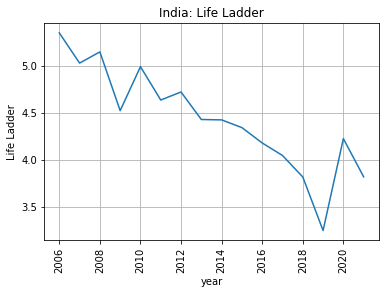

In [140]:
sns.lineplot(data = india, x = 'year', y = 'Life Ladder')
plt.xticks(rotation=90) 
plt.title("India: Life Ladder") 
plt.grid()
plt.show()  

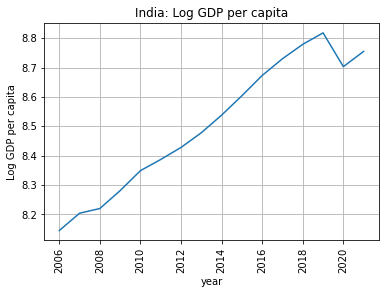

In [141]:
sns.lineplot(data = india, x = 'year', y = 'Log GDP per capita')
plt.xticks(rotation=90) 
plt.title("India: Log GDP per capita") 
plt.grid()
plt.show()  

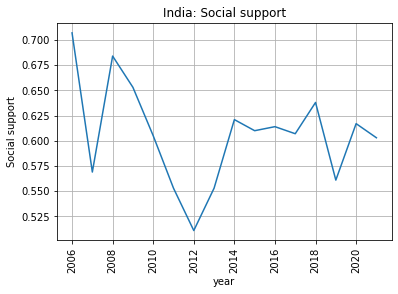

In [142]:
sns.lineplot(data = india, x = 'year', y = 'Social support')
plt.xticks(rotation=90) 
plt.title("India: Social support") 
plt.grid()
plt.show()  

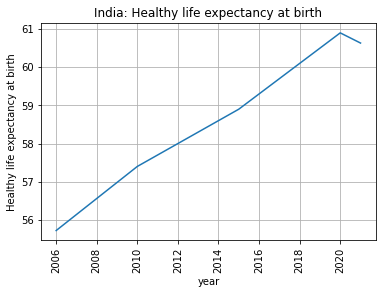

In [143]:
sns.lineplot(data = india, x = 'year', y = 'Healthy life expectancy at birth')
plt.xticks(rotation=90) 
plt.title("India: Healthy life expectancy at birth") 
plt.grid()
plt.show()  

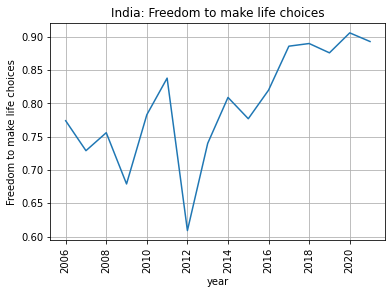

In [144]:
sns.lineplot(data = india, x = 'year', y = 'Freedom to make life choices')
plt.xticks(rotation=90) 
plt.title("India: Freedom to make life choices") 
plt.grid()
plt.show()  

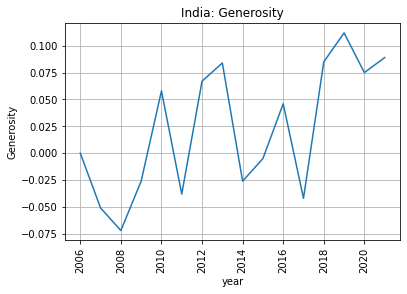

In [145]:
sns.lineplot(data = india, x = 'year', y = 'Generosity')
plt.xticks(rotation=90) 
plt.title("India: Generosity") 
plt.grid()
plt.show()  

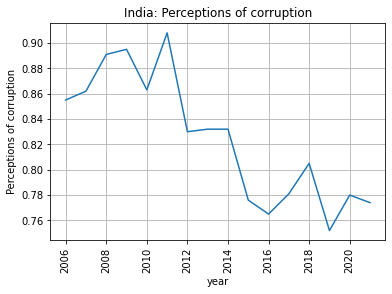

In [146]:
sns.lineplot(data = india, x = 'year', y = 'Perceptions of corruption')
plt.xticks(rotation=90) 
plt.title("India: Perceptions of corruption") 
plt.grid()
plt.show()  